In [1]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pandas.read_csv('prepared_data.csv') # Убедиться в правильности пути к файлу!
dataset.head(10) # Вывод первых 10 строк

,Vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,0.000000,0.256630,0.251074,0.420445,1.000000,0.925513,1.000000,1.229905
1,0.092516,0.045894,0.874463,1.000000,0.461880,0.694135,0.676123,1.529143
2,0.092516,0.045894,0.874463,1.000000,0.461880,0.694135,0.676123,1.332788
3,0.092516,0.045894,0.874463,1.000000,0.461880,0.694135,0.676123,1.092443
4,0.092516,0.045894,0.874463,0.717236,0.461880,0.694135,0.478091,0.833975
5,0.092516,0.035488,0.874463,1.000000,0.653197,0.694135,0.676123,1.692548
6,0.092516,0.024463,1.000000,1.000000,0.653197,0.925513,0.676123,1.832489
7,0.092516,0.024463,1.000000,1.000000,0.653197,0.925513,0.676123,2.112740
8,0.092516,0.024463,1.000000,1.000000,0.653197,0.925513,0.676123,2.312497
9,0.092516,0.024463,1.000000,1.000000,0.923760,1.000000,0.956183,2.312497


In [3]:
# Выделение входных и выходных параметров:
# Выходной параметр - значение столбца обработанного набора данных, соответсвующее столбцу №8 из первоначального набора данных (machine.data.csv).
# Входные параметры - все остальные столбцы обработанного набора данных.
# Используем .values, чтобы индексы не попали в новые переменные и в дальнейшем не мешали нам, например, при построении графиков.
X = dataset.iloc[:, 0:7].values
Y = dataset['PRP'].values

# Обратите внимание на структуру вашего обработанного файлы и измените индексы, если нужно.

In [4]:
# Разделение данных на обучающую и тестовую выборки:
# Используем метод train_test_split библиотеки sklearn.
# Он разделяет заданные массивы входных и выходных параметров на две части каждый.
# Значение test_size определяет долю тестовой выборки в исходных данных.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.

# Количество нейронов во входном слое должно быть равно количеству входных параметров.
input_layer_size = 7

# Количество нейронов в каждом скрытом слое и количество таких слоёв могут быть выбраны произвольно.
# Увеличение числа нейронов относительно предыдущего слоя позволяет лучше обрабатывать отдельные примеры.
# Уменьшение числа нейронов относительно предыдущего слоя позволяет обощать информацию и выводить новые правила.
# Увеличение числа слоёв помогает сети работать как более сложная функция.
first_hidden_layer_size = 15
second_hidden_layer_size = 13
third_hidden_layer_size = 15

# Количество нейронов в выходном слое должно быть равно количеству выходных параметров.
output_layer_size = 1

# Параметры обучения нейронной сети: количество эпох и размер батча.
epochs_number = 100
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(third_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [7]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                208       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 554
Trainable params: 554
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 167 samples, validate on 42 samples
Epoch 1/100
167/167 [==============================] - 0s 2ms/step - loss: 1.0793 - mean_absolute_error: 0.8131 - mean_squared_error: 1.0793 - val_loss: 1.3077 - val_mean_absolute_error: 0.9262 - val_mean_squared_error: 1.3077
Epoch 2/100
167/167 [==============================] - 0s 437us/step - loss: 0.9745 - mean_absolute_error: 0.7769 - mean_squared_error: 0.9745 - val_loss: 1.1748 - val_mean_absolute_error: 0.8815 - val_mean_squared_error: 1.1748
Epoch 3/100
167/167 [==============================] - 0s 234us/step - loss: 0.9026 - mean_absolute_error: 0.7560 - mean_squared_error: 0.9026 - val_loss: 1.1063 - val_mean_absolute_error: 0.8506 - val_mean_squared_error: 1.1063
Epoch 4/100
167/167 [==============================] - 0s 442us/step - loss: 0.8465 - mean_absolute_error: 0.7299 - mean_squared_error: 0.8465 - val_loss: 1.0430 - val_mean_absolute_error: 0.8195 - val_mean_squared_error: 1.0430
Epoch 5/100
167/167 [====================

167/167 [==============================] - 0s 412us/step - loss: 0.1810 - mean_absolute_error: 0.3408 - mean_squared_error: 0.1810 - val_loss: 0.1363 - val_mean_absolute_error: 0.2905 - val_mean_squared_error: 0.1363
Epoch 37/100
167/167 [==============================] - 0s 131us/step - loss: 0.1771 - mean_absolute_error: 0.3304 - mean_squared_error: 0.1771 - val_loss: 0.1417 - val_mean_absolute_error: 0.2951 - val_mean_squared_error: 0.1417
Epoch 38/100
167/167 [==============================] - 0s 135us/step - loss: 0.1770 - mean_absolute_error: 0.3284 - mean_squared_error: 0.1770 - val_loss: 0.1381 - val_mean_absolute_error: 0.2913 - val_mean_squared_error: 0.1381
Epoch 39/100
167/167 [==============================] - 0s 166us/step - loss: 0.1740 - mean_absolute_error: 0.3287 - mean_squared_error: 0.1740 - val_loss: 0.1371 - val_mean_absolute_error: 0.2896 - val_mean_squared_error: 0.1371
Epoch 40/100
167/167 [==============================] - 0s 133us/step - loss: 0.1742 - mean_a

Epoch 72/100
167/167 [==============================] - 0s 339us/step - loss: 0.1549 - mean_absolute_error: 0.3083 - mean_squared_error: 0.1549 - val_loss: 0.1278 - val_mean_absolute_error: 0.2718 - val_mean_squared_error: 0.1278
Epoch 73/100
167/167 [==============================] - 0s 131us/step - loss: 0.1521 - mean_absolute_error: 0.3072 - mean_squared_error: 0.1521 - val_loss: 0.1356 - val_mean_absolute_error: 0.2799 - val_mean_squared_error: 0.1356
Epoch 74/100
167/167 [==============================] - 0s 131us/step - loss: 0.1545 - mean_absolute_error: 0.3086 - mean_squared_error: 0.1545 - val_loss: 0.1261 - val_mean_absolute_error: 0.2694 - val_mean_squared_error: 0.1261
Epoch 75/100
167/167 [==============================] - 0s 363us/step - loss: 0.1518 - mean_absolute_error: 0.3064 - mean_squared_error: 0.1518 - val_loss: 0.1317 - val_mean_absolute_error: 0.2751 - val_mean_squared_error: 0.1317
Epoch 76/100
167/167 [==============================] - 0s 130us/step - loss: 0.

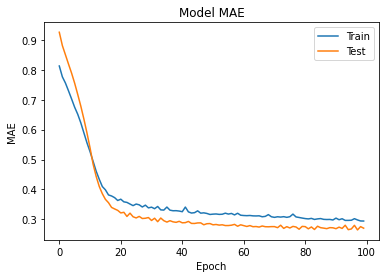

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

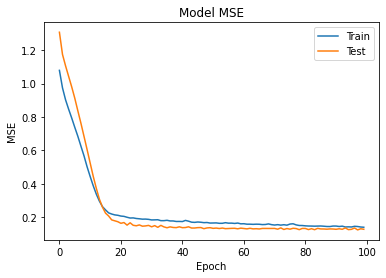

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

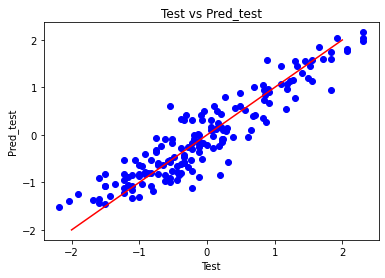

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

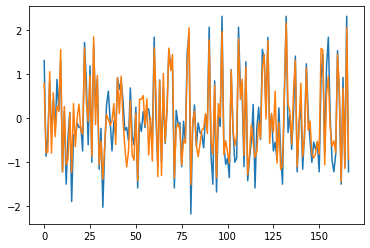

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Таким образом, обучение по обучающей выборке проведено.
# Теперь проверим работу нейроной сети на тестовой выборке.

# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

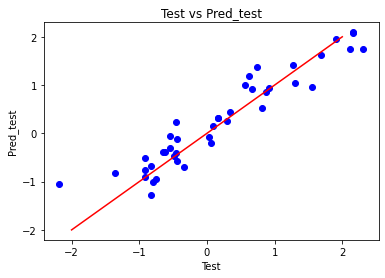

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

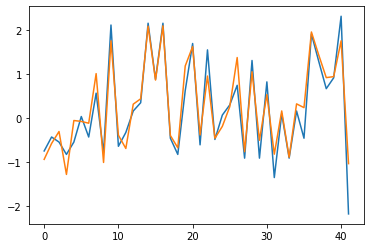

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Итого, качество работы нейронной сети на тестовых данных ниже, чем на обучающих - это ожидаемо.
# Тем не менее, нейронная сеть способна найти зависимости и предсказвать значение Y по X с приемлемым уровенм точности.

# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.3707715430705381
0.35681902680659633


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
# Для этого используем библиотеку scipy и метод stats.shapiro.
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9922882914543152, p = 0.5146133899688721
Test k = 0.9763567447662354, p = 0.5252570509910583


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9924770593643188, p_s = 0.36145853996276855
k_n = 1.3861953541755196, p_n = 0.5000247523487512


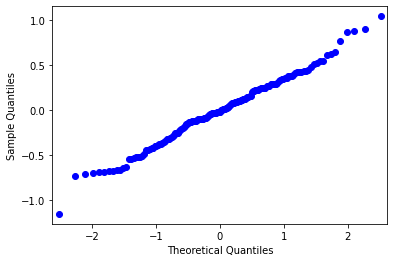

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

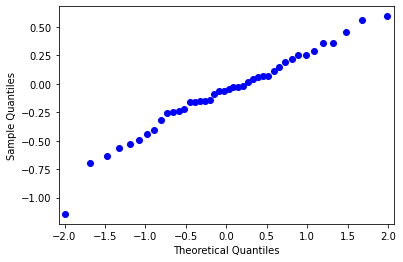

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

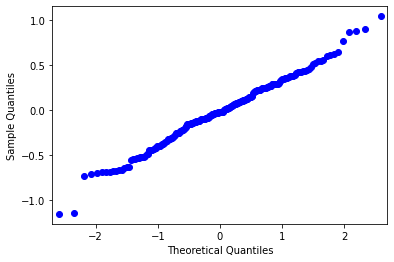

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

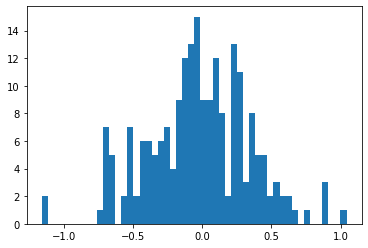

In [24]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('SimpleNeuralNetwork.h5')